### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
data = pd.read_csv("student_performance_data.csv")

### Understand The Dataset

In [3]:
data.head()

,Unnamed: 0,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0,1001,36,Female,Caucasian,Some College,19.833723,NaN,1,Moderate,0,0,1,0,2.929196,2.0
1,1,1002,18,Male,Caucasian,High School,15.408756,0.0,0,Low,0,0,0,0,3.042915,1.0
2,2,1003,15,Male,Asian,Bachelor's,4.210570,26.0,0,Moderate,0,0,0,0,0.112602,4.0
3,3,1004,17,Female,Caucasian,Bachelor's,10.028829,14.0,0,High,1,0,0,0,2.054218,3.0
4,4,1005,36,Female,Caucasian,Some College,4.672495,17.0,1,NaN,0,0,0,0,1.288061,4.0


In [4]:
data.tail()

,Unnamed: 0,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2745,910,1911,17,Male,African American,Some College,39.443676,12.0,0,Low,1,1,0,0,2.478699,3.0
2746,1846,2847,18,Female,Asian,Some College,9.699846,11.0,0,NaN,1,0,0,1,2.506415,2.0
2747,1560,2561,17,Female,Other,Some College,7.821845,20.0,0,High,0,0,0,0,1.615572,4.0
2748,1559,2560,17,Male,Asian,Bachelor's,19.641548,17.0,0,Very High,1,1,1,0,2.495379,3.0
2749,349,1350,17,Female,Caucasian,NaN,12.253687,4.0,0,Moderate,0,0,0,0,2.833760,2.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2750 non-null   int64  
 1   StudentID          2750 non-null   int64  
 2   Age                2750 non-null   int64  
 3   Gender             2750 non-null   object 
 4   Ethnicity          2750 non-null   object 
 5   ParentalEducation  2470 non-null   object 
 6   StudyTimeWeekly    2497 non-null   float64
 7   Absences           2616 non-null   float64
 8   Tutoring           2750 non-null   int64  
 9   ParentalSupport    2129 non-null   object 
 10  Extracurricular    2750 non-null   int64  
 11  Sports             2750 non-null   int64  
 12  Music              2750 non-null   int64  
 13  Volunteering       2750 non-null   int64  
 14  GPA                2694 non-null   float64
 15  GradeClass         2750 non-null   float64
dtypes: float64(4), int64(8),

### Data Cleaning 

#### Check for missing values

In [6]:
data.isnull()

,Unnamed: 0,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2746,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2747,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2748,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

Unnamed: 0             0
StudentID              0
Age                    0
Gender                 0
Ethnicity              0
ParentalEducation    280
StudyTimeWeekly      253
Absences             134
Tutoring               0
ParentalSupport      621
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
GPA                   56
GradeClass             0
dtype: int64

#### Visualize our missing values

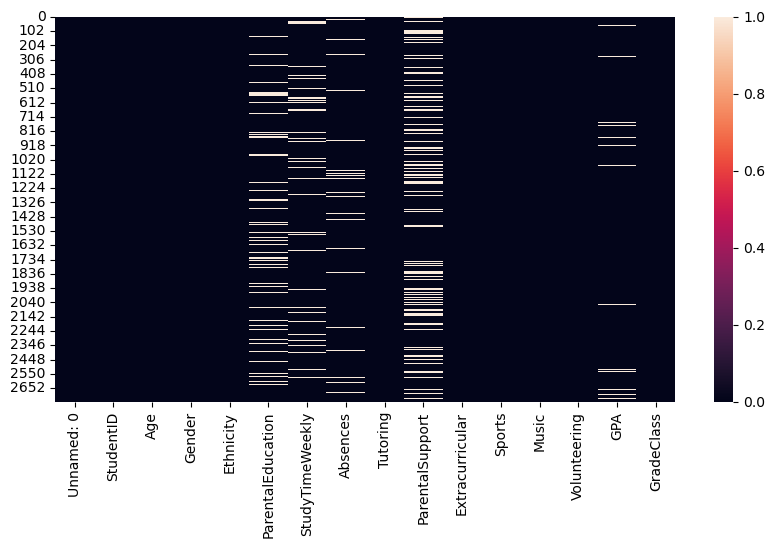

In [8]:
plt.figure(figsize=(10,5)) # Set the figsize of the visual
sns.heatmap(data.isnull()) # set the function to be involve in the visual
plt.show() # Display the visualisation

<Axes: >

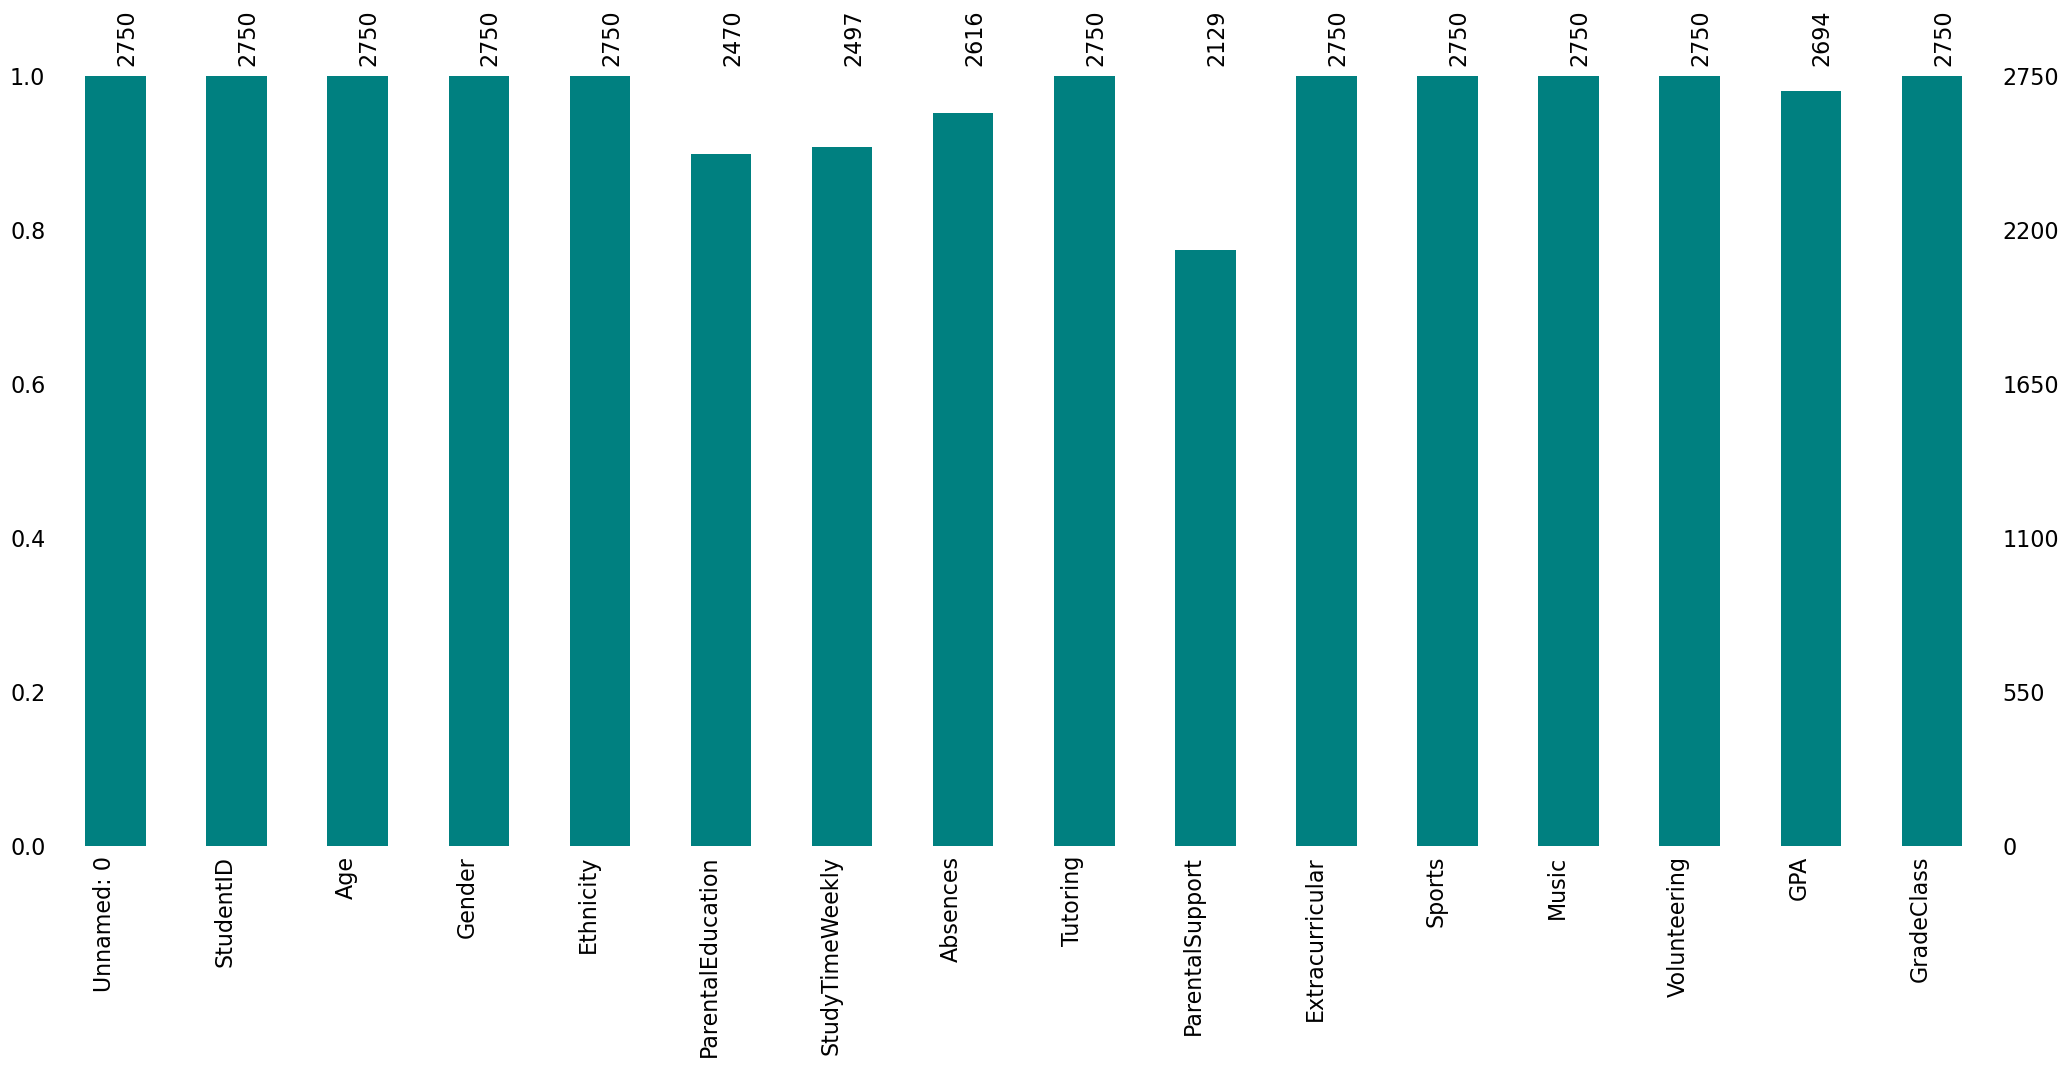

In [9]:
import missingno as msn

msn.bar(data, color="teal", label_rotation=90) # To visualise the missing data

#### Drop irrelevant columns/features

In [10]:
data.drop(["Unnamed: 0","StudentID"], axis=1, inplace=True)

In [11]:
data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,36,Female,Caucasian,Some College,19.833723,NaN,1,Moderate,0,0,1,0,2.929196,2.0
1,18,Male,Caucasian,High School,15.408756,0.0,0,Low,0,0,0,0,3.042915,1.0
2,15,Male,Asian,Bachelor's,4.210570,26.0,0,Moderate,0,0,0,0,0.112602,4.0
3,17,Female,Caucasian,Bachelor's,10.028829,14.0,0,High,1,0,0,0,2.054218,3.0
4,36,Female,Caucasian,Some College,4.672495,17.0,1,NaN,0,0,0,0,1.288061,4.0


#### Handling missing values

In [12]:
numerical_data = data.select_dtypes(include="number")
numerical_column = numerical_data.columns
numerical_column

Index(['Age', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'Extracurricular',
       'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [13]:
categorical_data = data.select_dtypes(include="object")
categorical_column = categorical_data.columns
categorical_column

Index(['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport'], dtype='object')

In [14]:
data.dropna(subset=["StudyTimeWeekly", "GPA"], inplace=True)

In [15]:
data["Absences"] = data["Absences"].fillna(data["Absences"].median())

In [16]:
data["ParentalSupport"] = data["ParentalSupport"].fillna(data["ParentalSupport"].mode().iloc[0])

In [17]:
data["ParentalEducation"] = data["ParentalEducation"].fillna(data["ParentalEducation"].mode().iloc[0])

In [18]:
data.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

#### Check for duplicate data

In [19]:
data.duplicated().sum()

207

In [20]:
data = data.drop_duplicates()
data.duplicated().sum()

0

#### Statistical Summary

In [21]:
data.describe()

,Age,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,17.567411,12.548255,14.421429,0.301786,0.327232,0.303571,0.195536,0.152679,1.919594,2.963393
std,4.613117,10.227785,8.257798,0.459135,0.469308,0.459902,0.396701,0.359758,0.917503,1.239336
min,15.000000,0.004859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,5.379694,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.174199,2.000000
50%,17.000000,10.495772,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.921281,3.000000
75%,18.000000,16.246828,21.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.635429,4.000000
max,36.000000,39.443676,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### Univariate Analysis

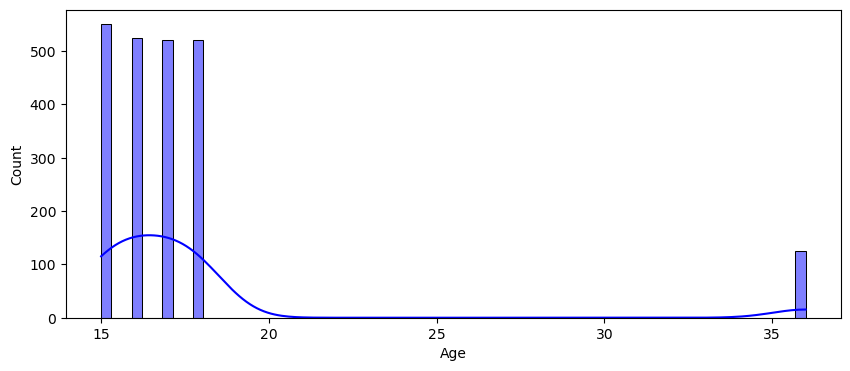

In [22]:
# variable/Features/Columns

# Check the distribution of the student Age

plt.figure(figsize=(10, 4))
sns.histplot(data["Age"], color="blue", kde=True)
plt.show()

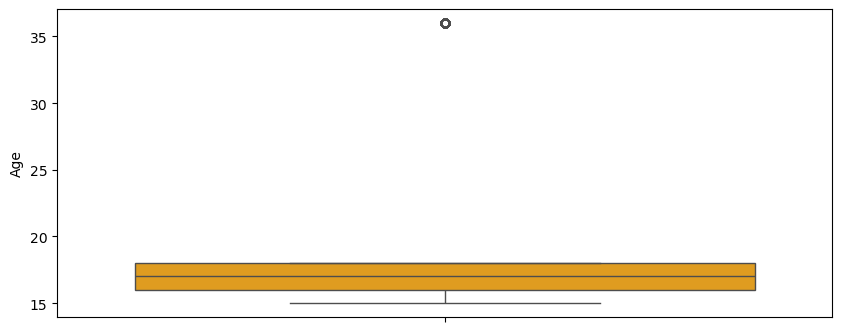

In [23]:
plt.figure(figsize=(10, 4))
sns.boxplot(data["Age"], color="orange",)
plt.show()

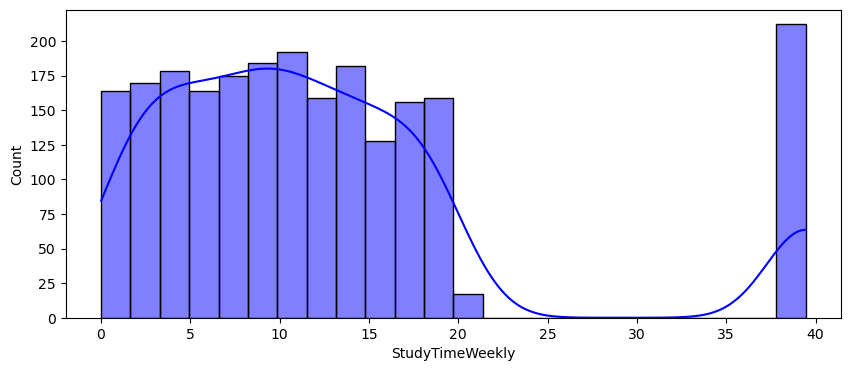

In [24]:
# Check the distribution of the student Study Time on weekly bases

plt.figure(figsize=(10, 4))
sns.histplot(data["StudyTimeWeekly"], color="blue", kde=True)
plt.show()

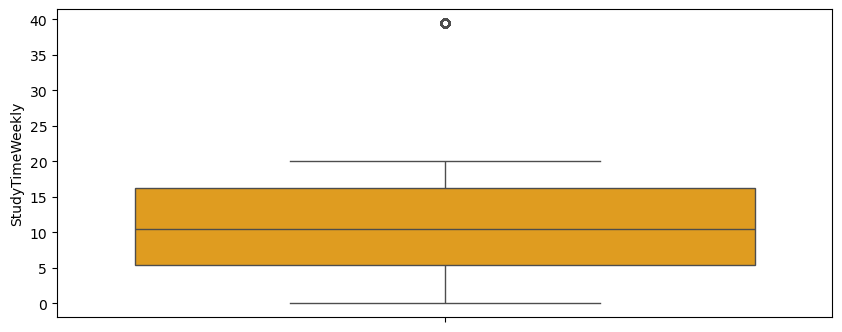

In [25]:
plt.figure(figsize=(10, 4))
sns.boxplot(data["StudyTimeWeekly"], color="orange")
plt.show()

#### Subploting

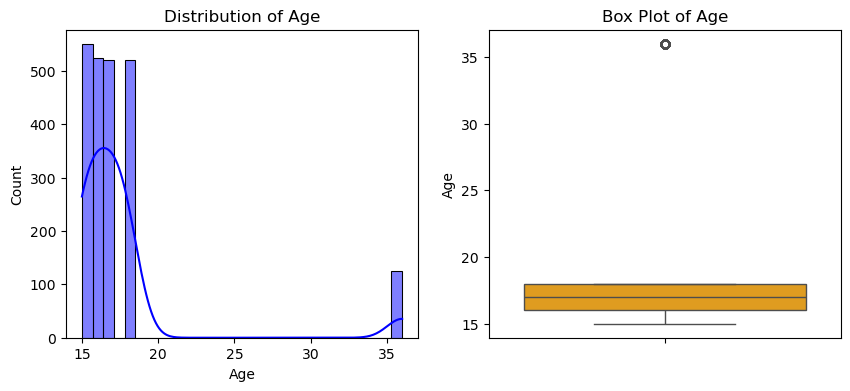

In [26]:
# Subplot the Age distribution


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(data["Age"], bins=30, color="blue", kde=True, ax=axes[0])
axes[0].set_title("Distribution of Age")

sns.boxplot(data["Age"], color="orange", ax=axes[1])
axes[1].set_title("Box Plot of Age")

plt.show()

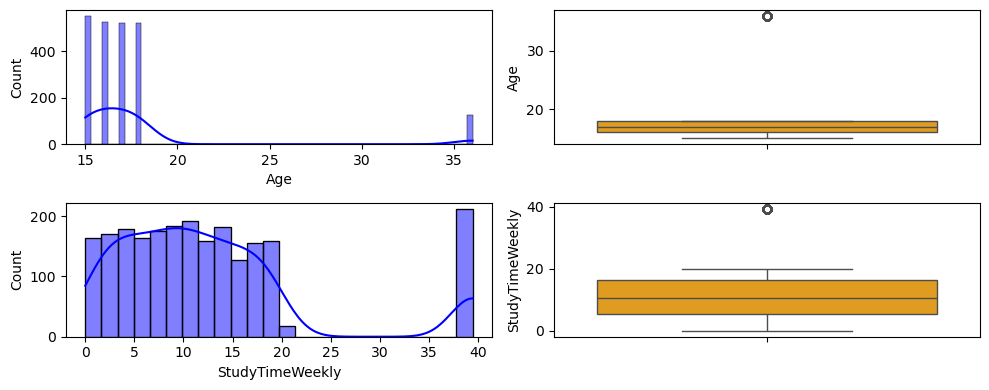

In [27]:
# Subplot the Student Study time

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))
sns.histplot(data["Age"], color="blue", kde=True, ax=axes[0,0])
sns.boxplot(data["Age"], color="orange",ax=axes[0,1])
sns.histplot(data["StudyTimeWeekly"], color="blue", kde=True,ax=axes[1,0] )
sns.boxplot(data["StudyTimeWeekly"], color="orange", ax=axes[1,1])

plt.tight_layout()
plt.show()

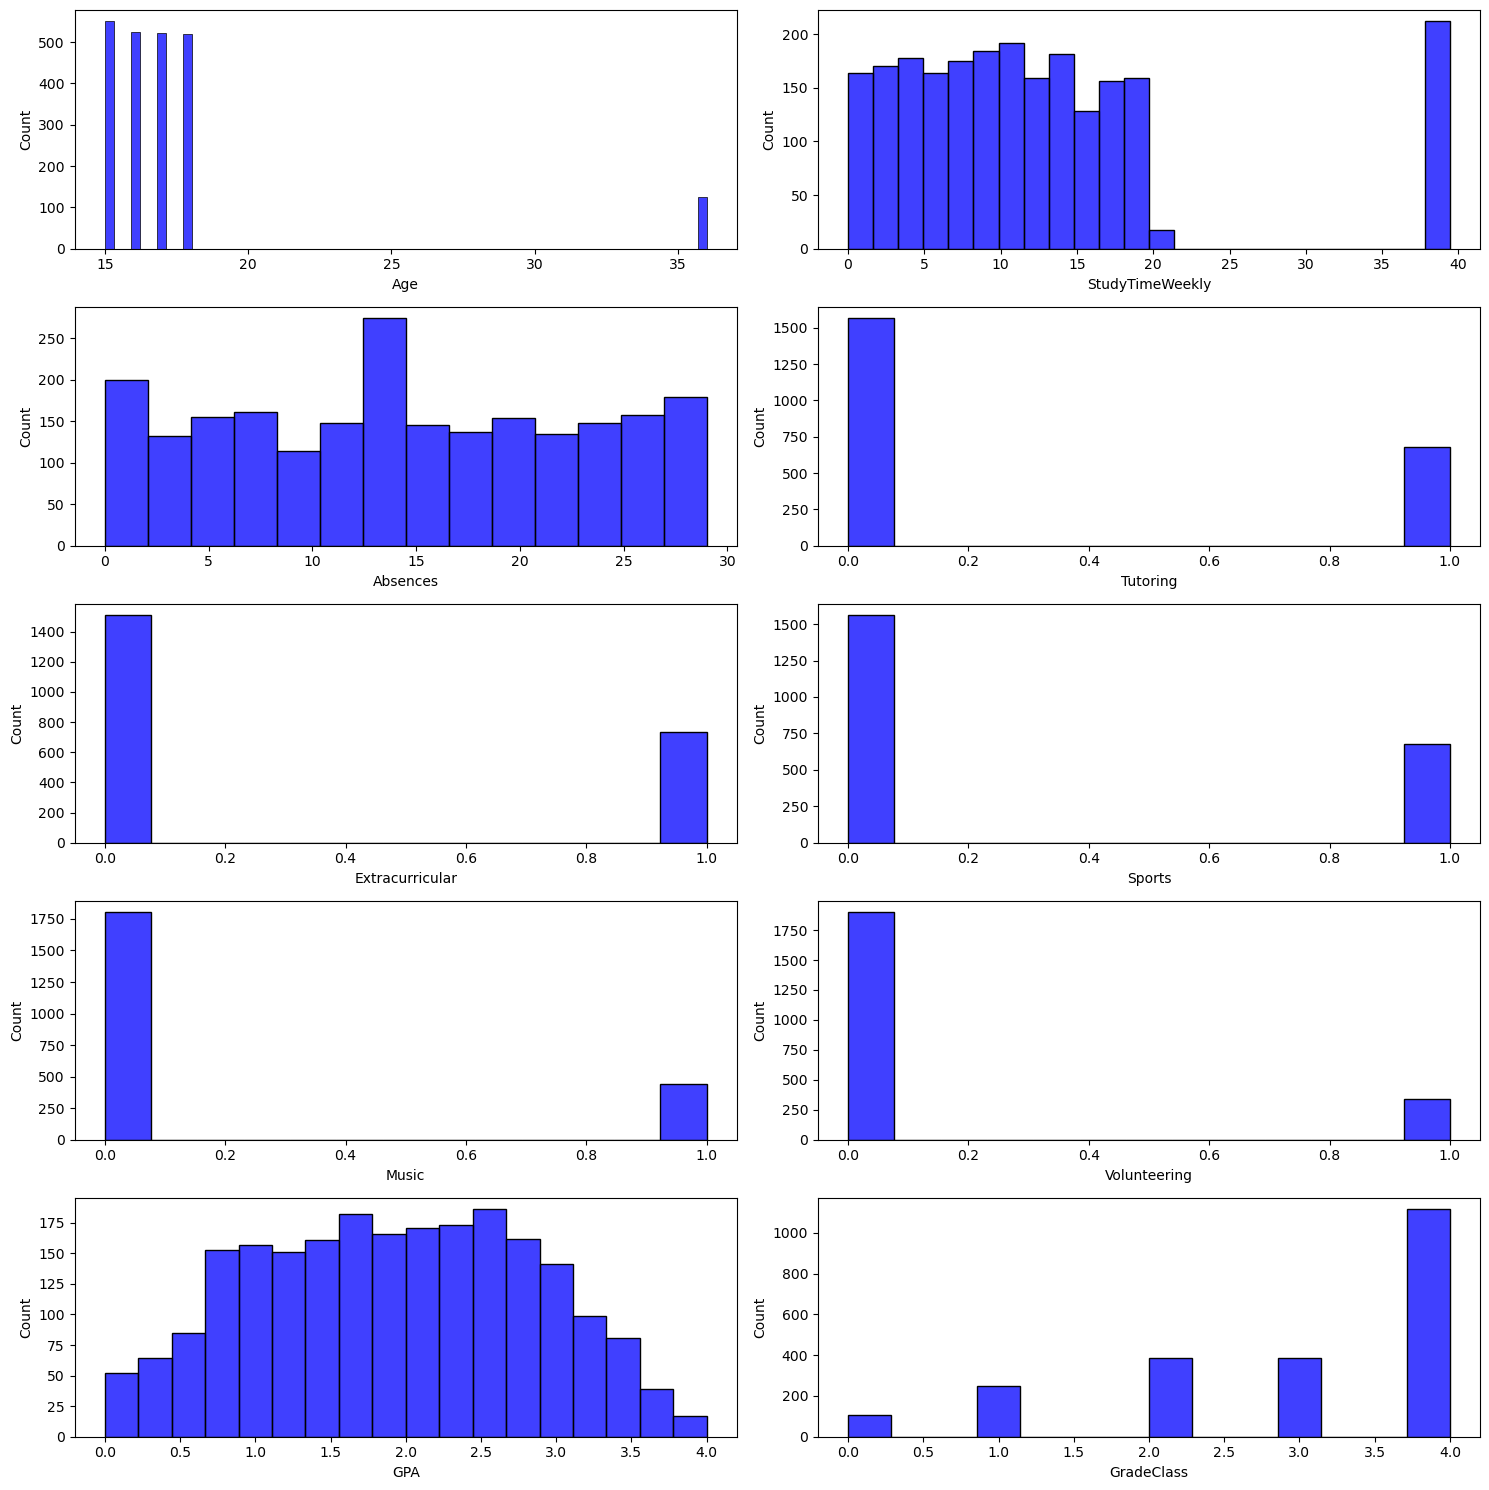

In [28]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for index, column_name in enumerate(numerical_column):
    sns.histplot(data[column_name], color="blue", kde=False ,ax=axes[index])

plt.tight_layout()
plt.show()

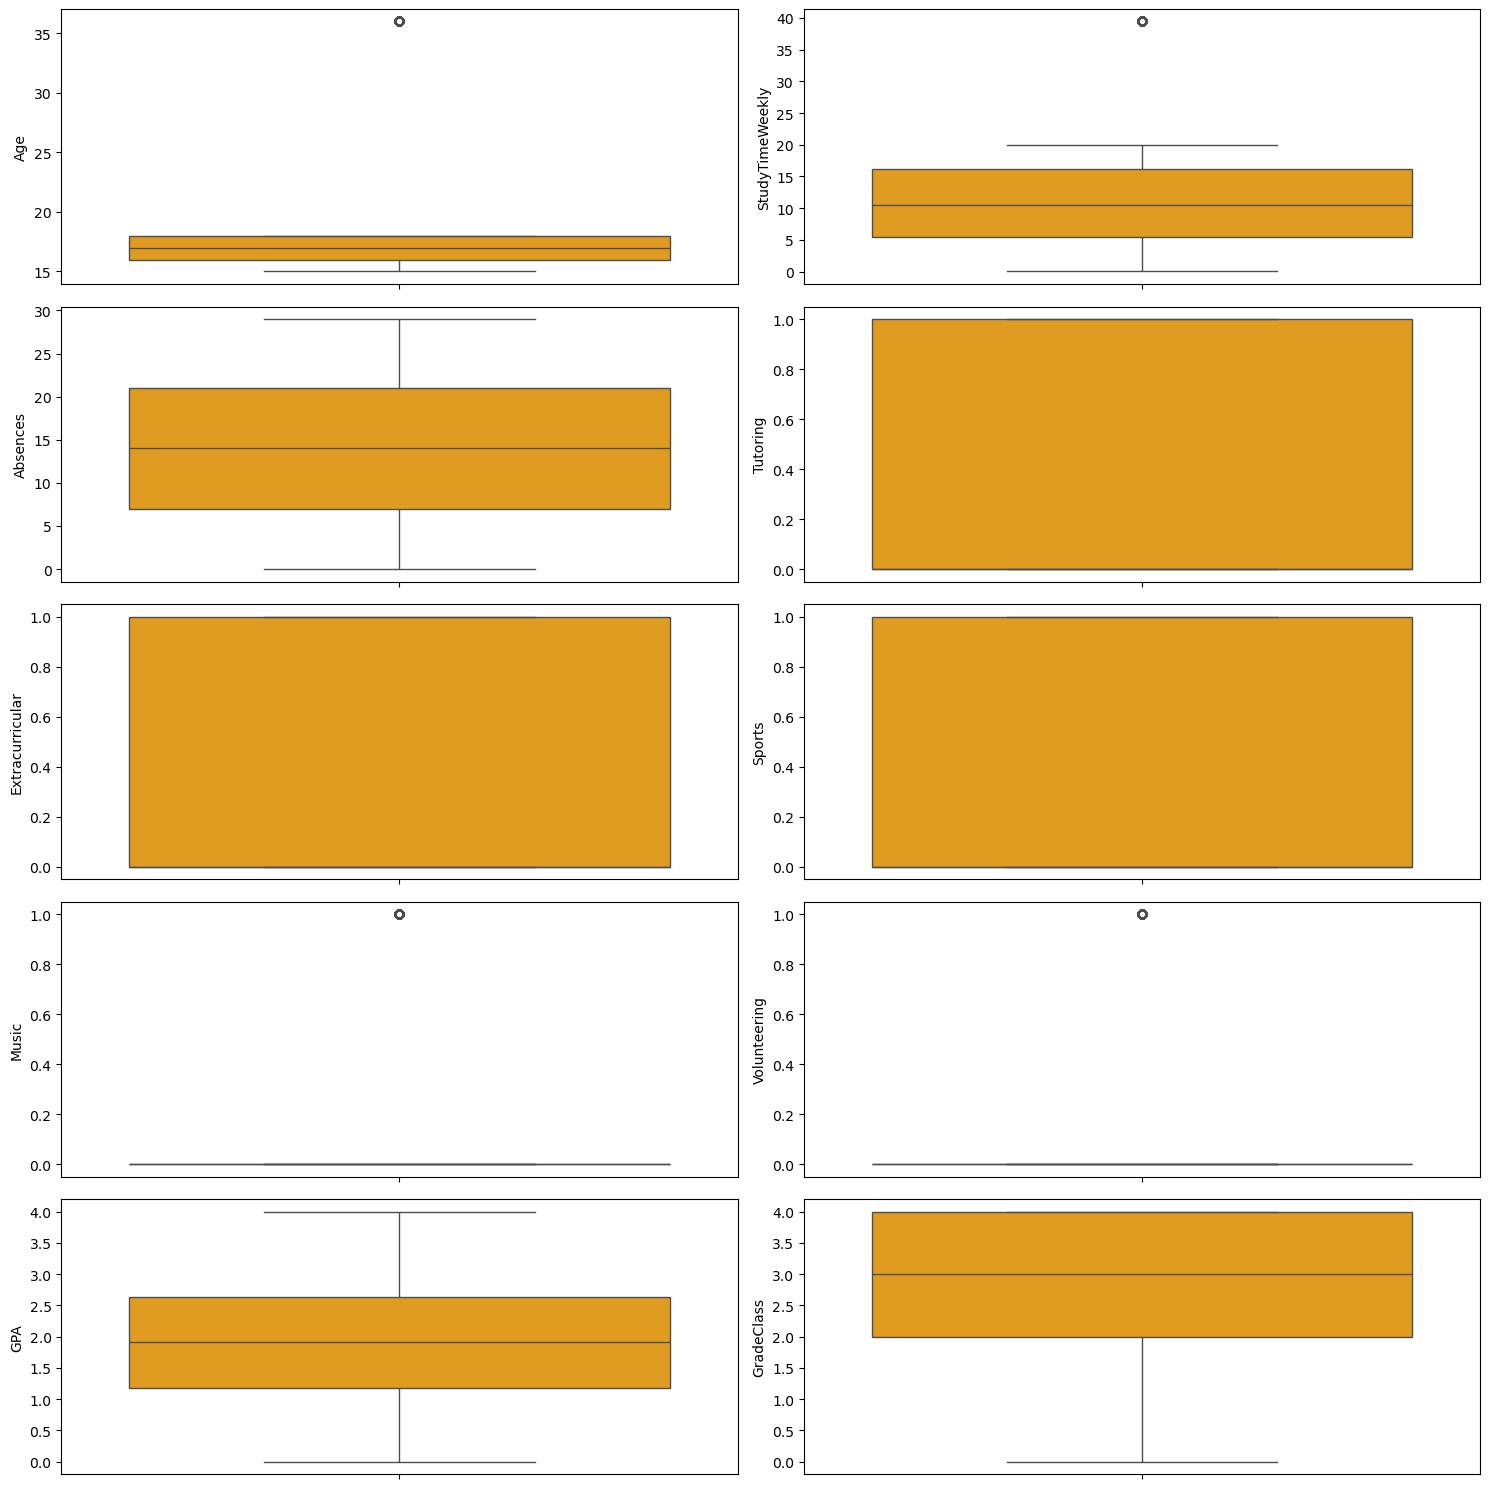

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for index, column_name in enumerate(numerical_column):
    sns.boxplot(data[column_name], color="orange", ax=axes[index])

plt.tight_layout()
plt.show()

### Handle Outliers

In [30]:
# calculate IQR for the affected colums

In [31]:
data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,36,Female,Caucasian,Some College,19.833723,14.0,1,Moderate,0,0,1,0,2.929196,2.0
1,18,Male,Caucasian,High School,15.408756,0.0,0,Low,0,0,0,0,3.042915,1.0
2,15,Male,Asian,Bachelor's,4.210570,26.0,0,Moderate,0,0,0,0,0.112602,4.0
3,17,Female,Caucasian,Bachelor's,10.028829,14.0,0,High,1,0,0,0,2.054218,3.0
4,36,Female,Caucasian,Some College,4.672495,17.0,1,Moderate,0,0,0,0,1.288061,4.0


In [32]:
#iqr = q3 - q1
q1 = data[["Age", "StudyTimeWeekly"]].quantile(0.25)
q3 = data[["Age", "StudyTimeWeekly"]].quantile(0.75)
iqr = q3 - q1
iqr

Age                 2.000000
StudyTimeWeekly    10.867134
dtype: float64

In [33]:
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [34]:
lower_bound

Age                13.000000
StudyTimeWeekly   -10.921007
dtype: float64

In [35]:
upper_bound

Age                21.000000
StudyTimeWeekly    32.547529
dtype: float64

In [36]:
outliers = (data[["Age", "StudyTimeWeekly"]] < lower_bound) | (data[["Age", "StudyTimeWeekly"]] > upper_bound)
outliers

,Age,StudyTimeWeekly
0,True,False
1,False,False
2,False,False
3,False,False
4,True,False
...,...,...
2741,False,False
2743,False,False
2744,False,False
2745,False,True


In [37]:
outliers = ((data[["Age", "StudyTimeWeekly"]] < lower_bound) | (data[["Age", "StudyTimeWeekly"]] > upper_bound)).any(axis=1)
outliers

0        True
1       False
2       False
3       False
4        True
        ...  
2741    False
2743    False
2744    False
2745     True
2748    False
Length: 2240, dtype: bool

In [38]:
data = data[~outliers]
data

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
1,18,Male,Caucasian,High School,15.408756,0.0,0,Low,0,0,0,0,3.042915,1.0
2,15,Male,Asian,Bachelor's,4.210570,26.0,0,Moderate,0,0,0,0,0.112602,4.0
3,17,Female,Caucasian,Bachelor's,10.028829,14.0,0,High,1,0,0,0,2.054218,3.0
5,18,Male,Caucasian,High School,8.191219,0.0,0,Moderate,1,0,0,0,3.084184,1.0
7,15,Female,African American,Higher,15.424496,22.0,1,Low,1,0,0,0,1.360143,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,18,Female,Caucasian,Some College,12.475444,1.0,1,Moderate,0,0,1,0,3.572945,1.0
2741,17,Male,Caucasian,High School,1.979372,14.0,1,High,1,0,0,0,2.877854,2.0
2743,17,Male,Asian,Some College,5.419264,6.0,0,Moderate,0,0,0,0,2.504005,2.0
2744,18,Male,Asian,Some College,1.760121,14.0,0,Moderate,0,0,0,0,1.567412,4.0


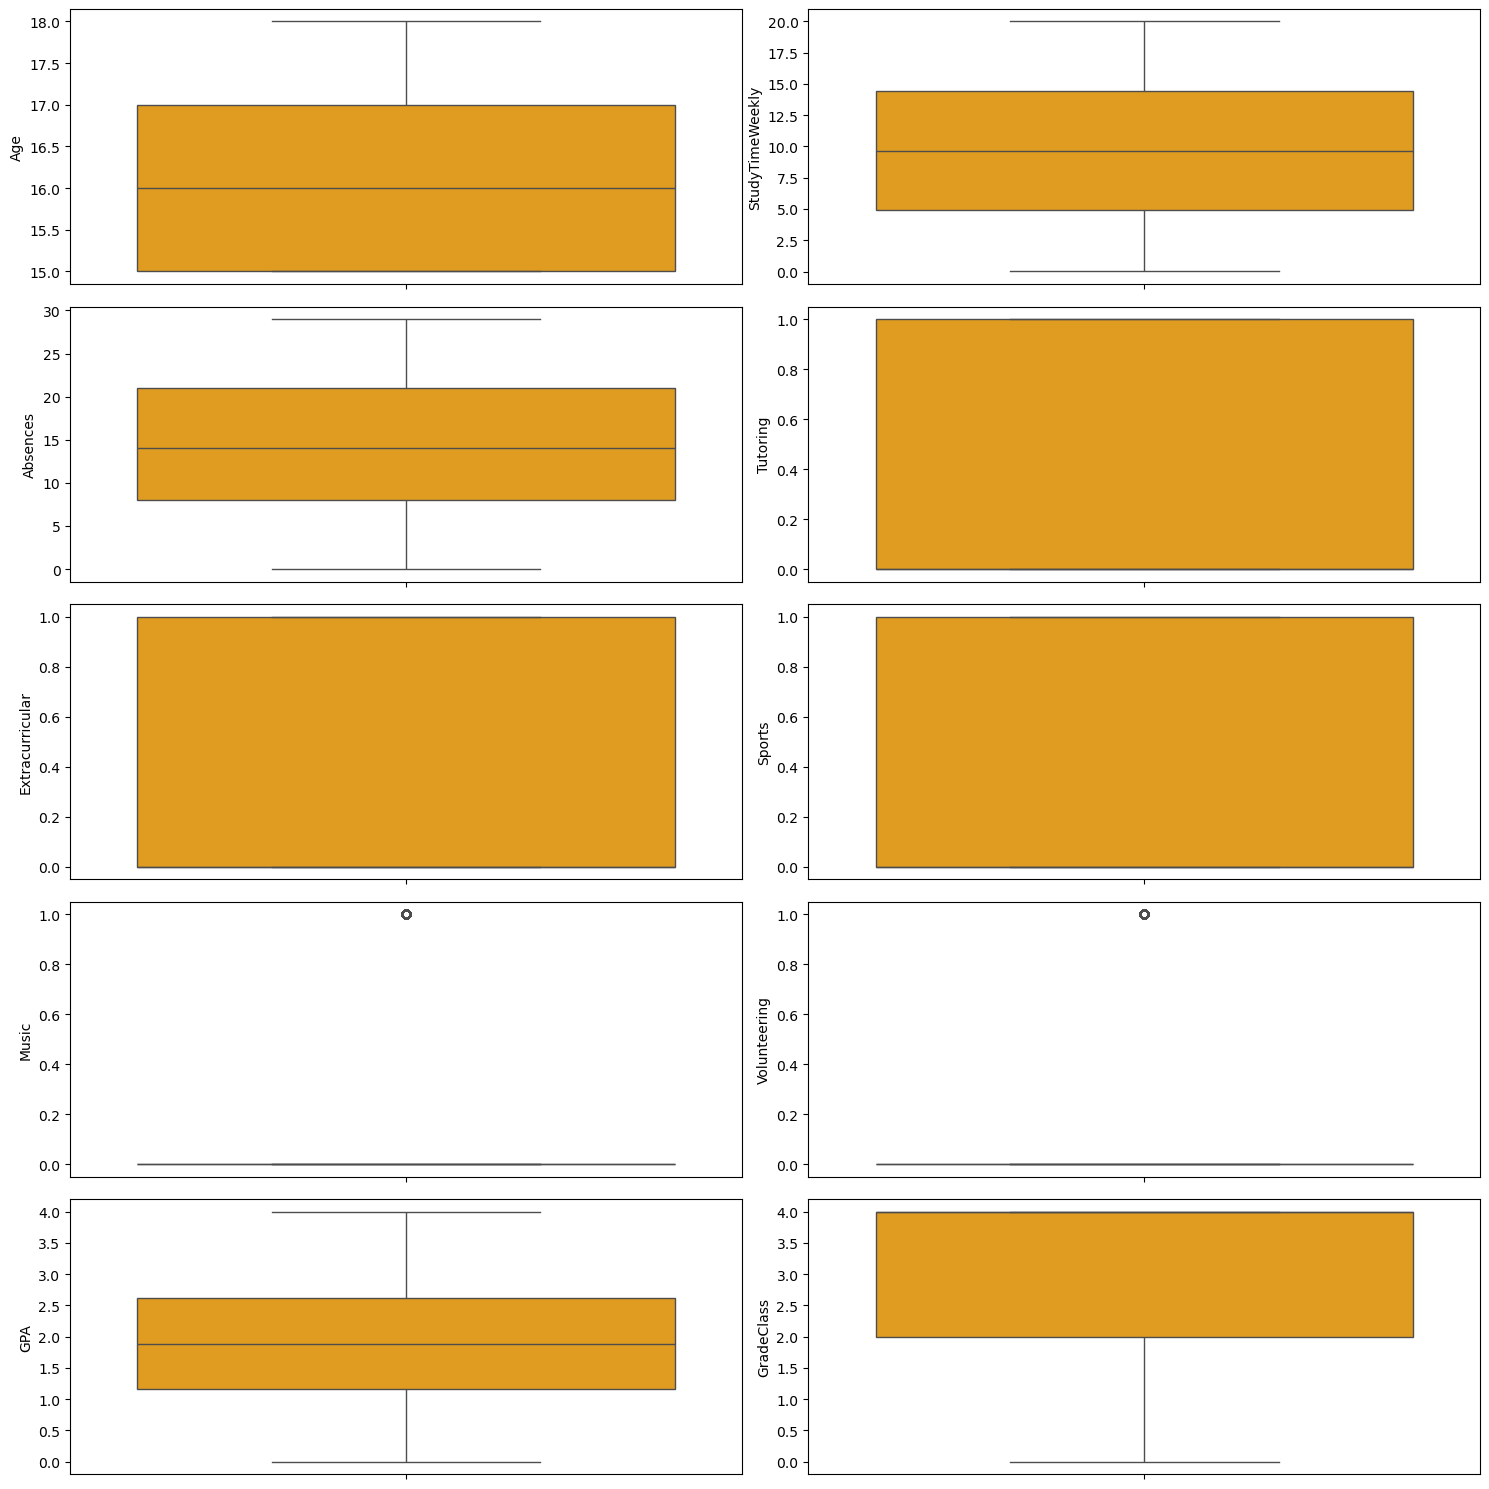

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for index, column_name in enumerate(numerical_column):
    sns.boxplot(data[column_name], color="orange", ax=axes[index])

plt.tight_layout()
plt.show()

### Categorical Data

In [40]:
categorical_column

Index(['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport'], dtype='object')

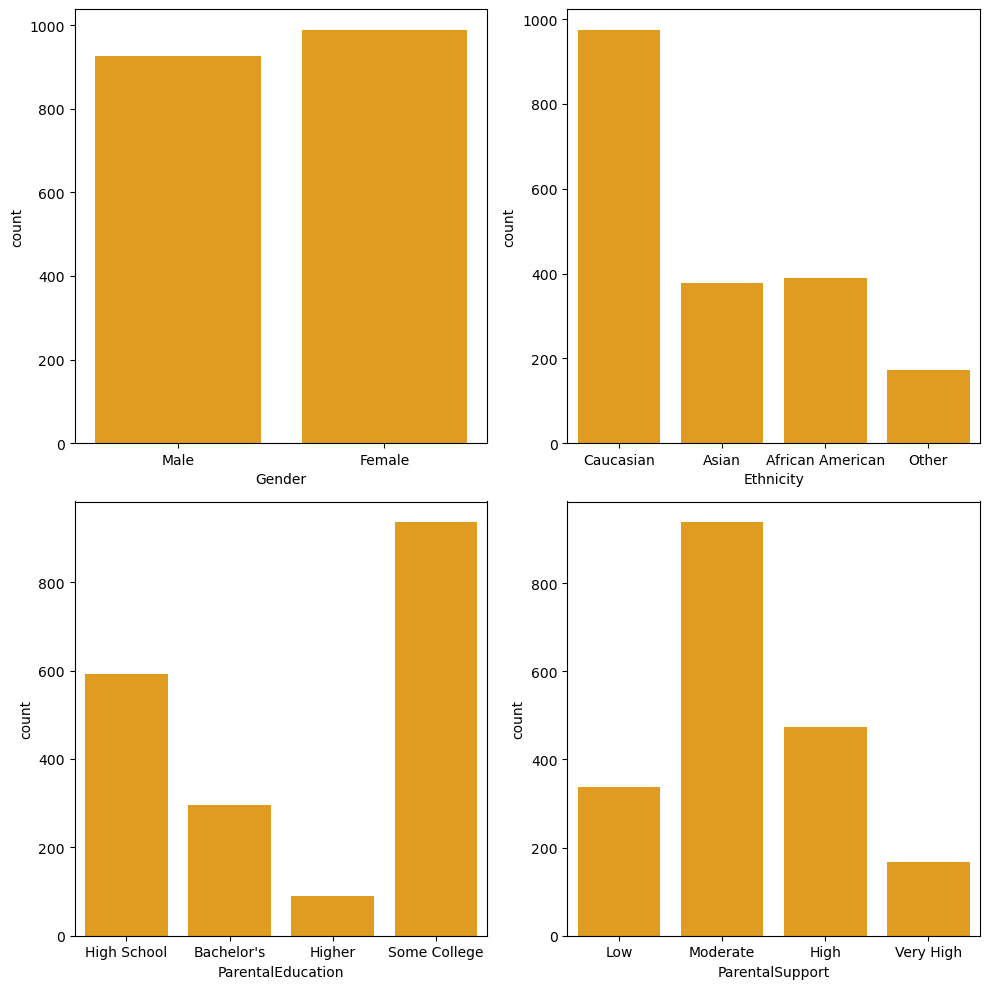

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for index, column_name in enumerate(categorical_column):
    sns.countplot(x=data[column_name], color="orange", ax=axes[index])

plt.tight_layout()
plt.show()

## Bivariate Analysis

Bivariate analysis examines the relationship between two variables, typically with one independent variable and one dependent variable.

Numerical vs Numerical:

We can use scatter plots and compute the correlation.
Numerical vs Categorical:

We can use bar plot, box plots, violin plots, or swarm plots.
Categorical vs Categorical:

We can use stacked bar plots or grouped bar plots.

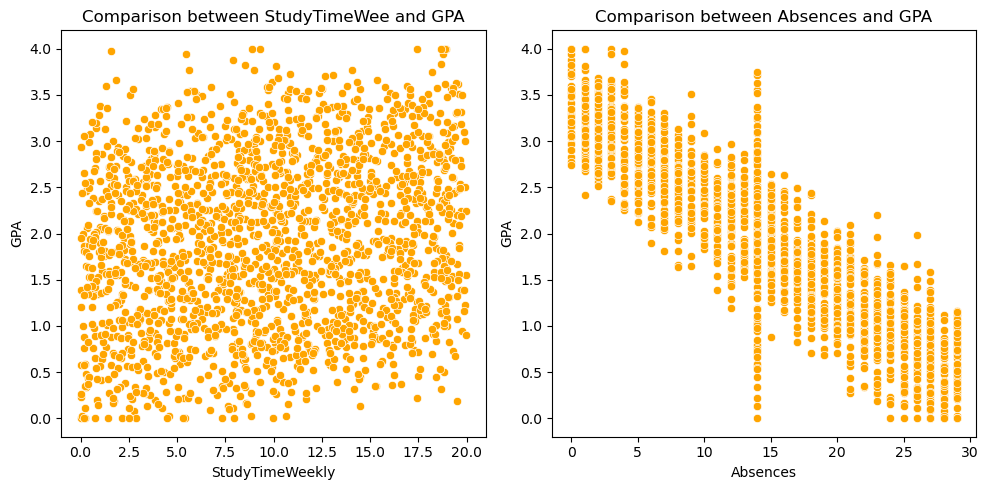

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(x=data["Absences"], y=data["GPA"], color="orange", ax=axes[1])
axes[1].set_title(f"Comparison between Absences and GPA")

sns.scatterplot(x=data["StudyTimeWeekly"], y=data["GPA"], color="orange", ax=axes[0])
axes[0].set_title(f"Comparison between StudyTimeWee and GPA")

plt.tight_layout()
plt.show()

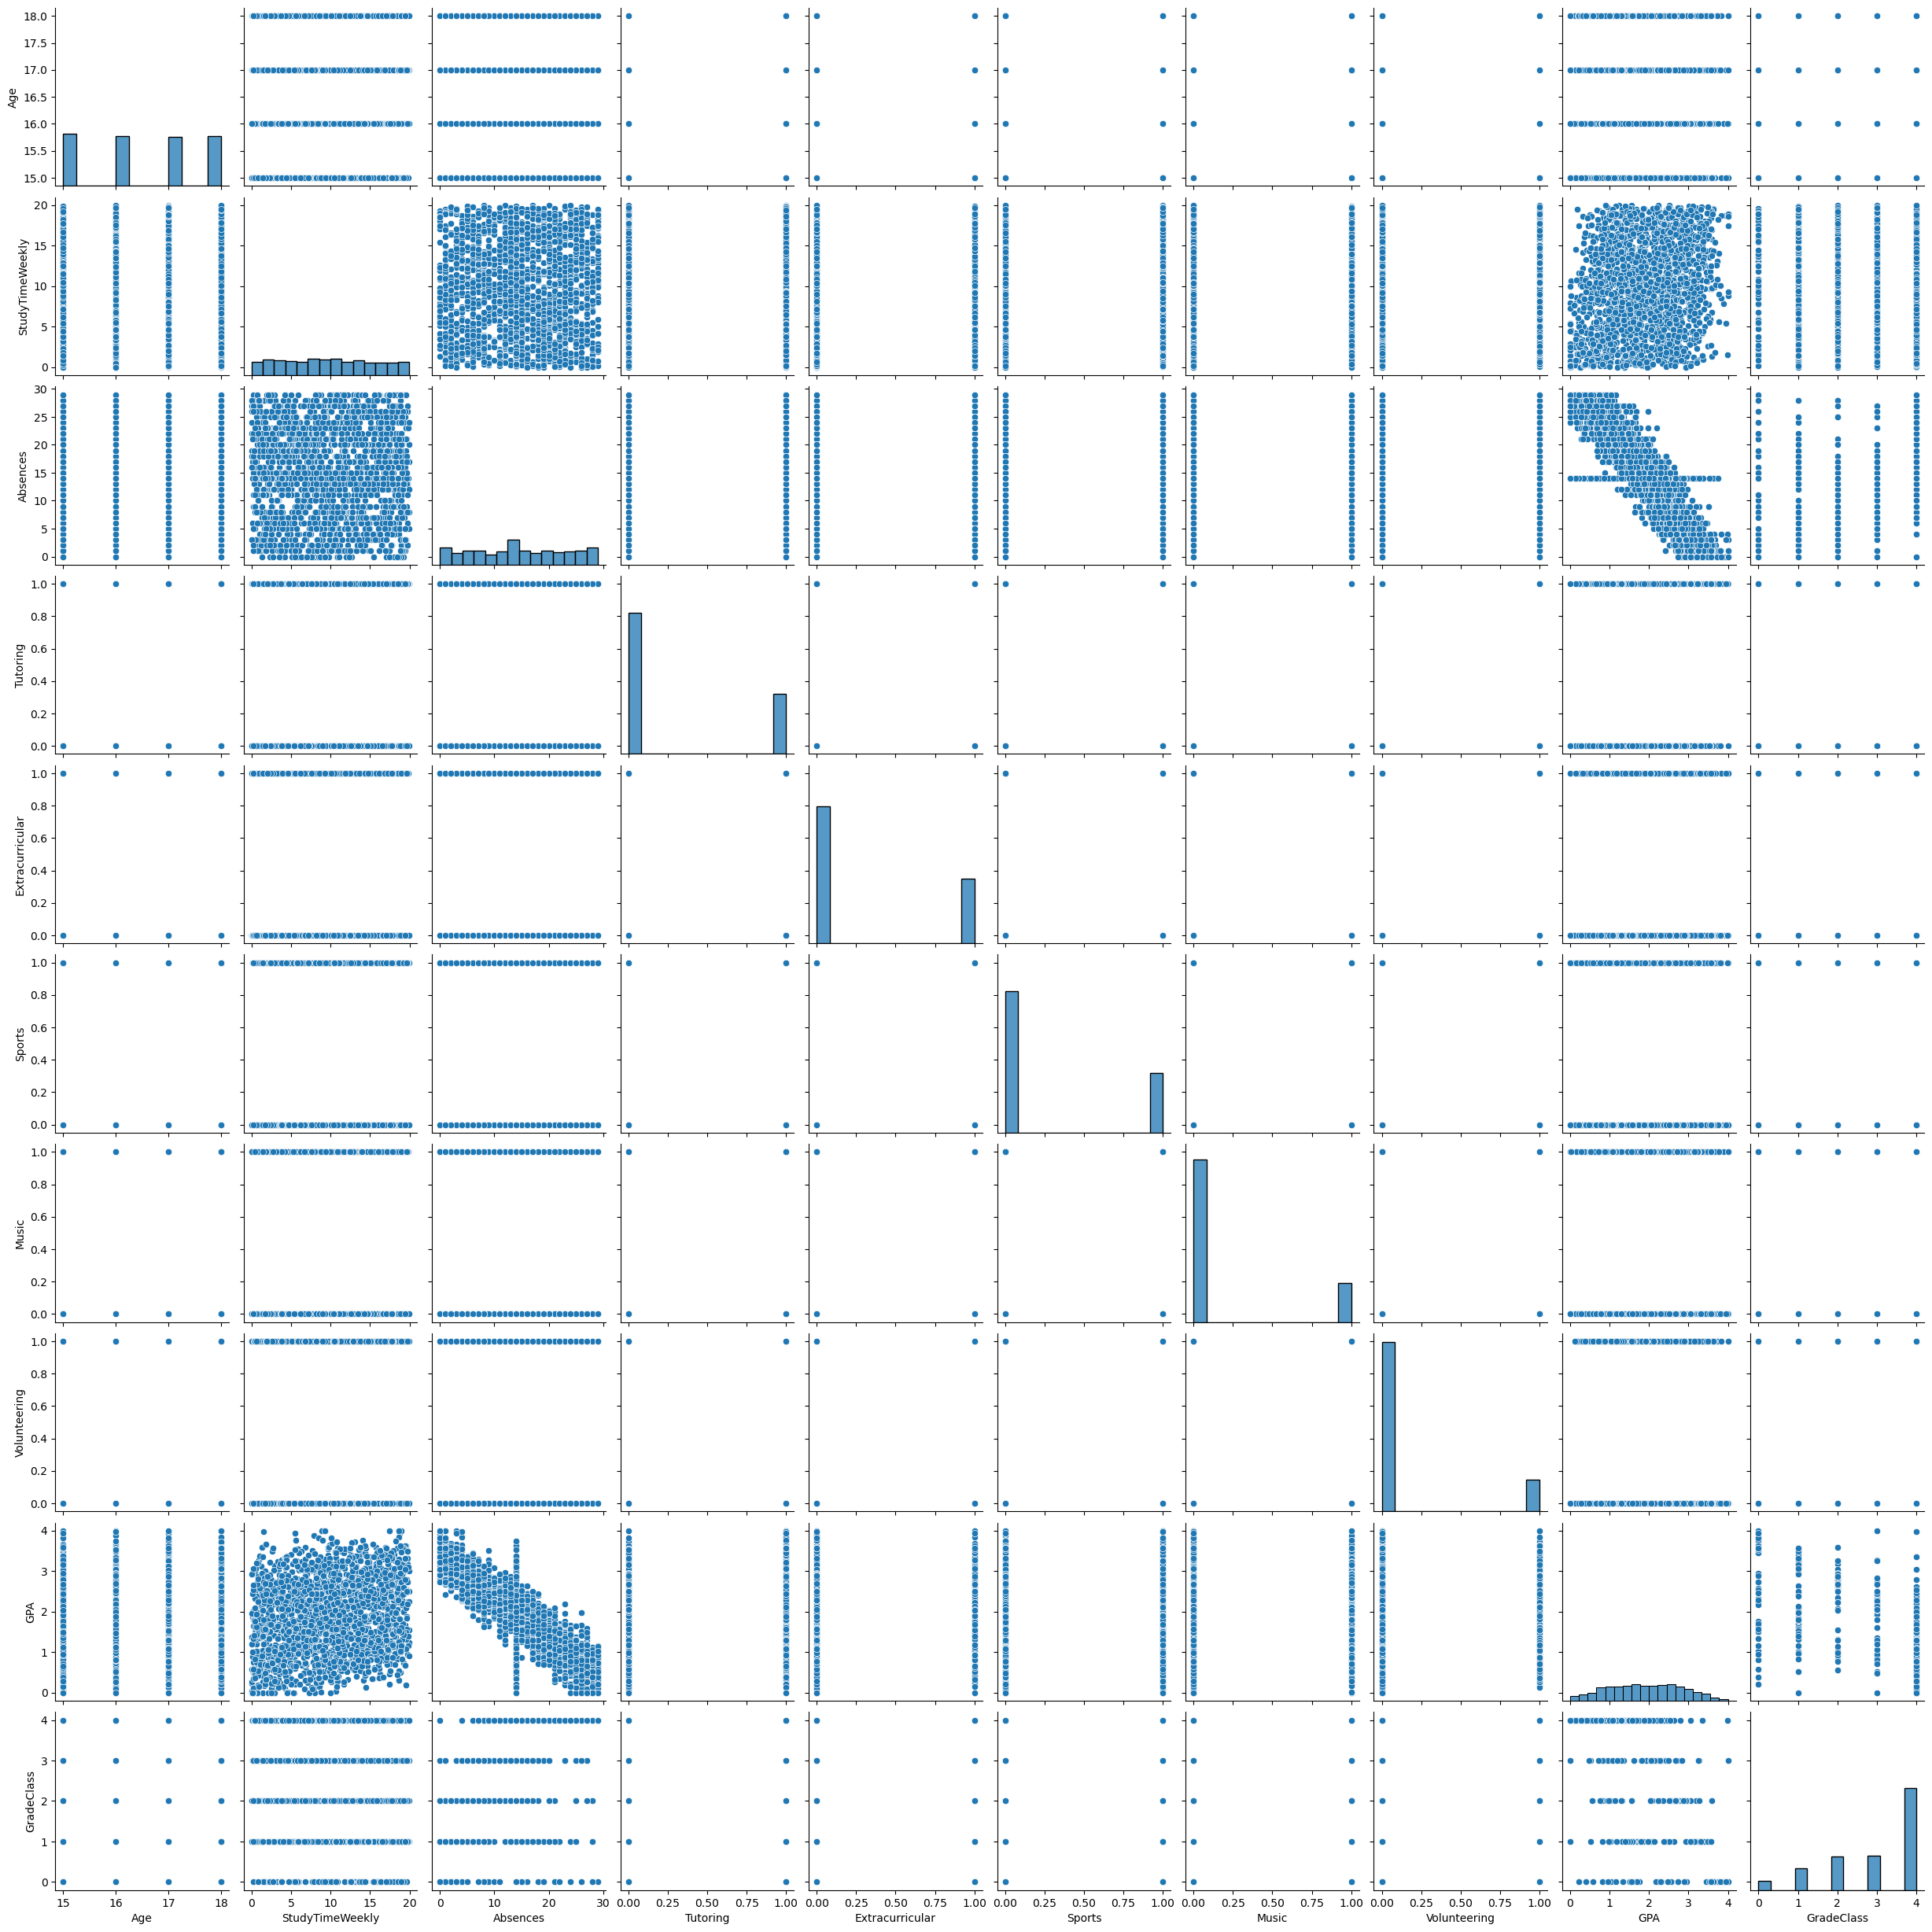

In [43]:
sns.pairplot(data[numerical_column])

### Numerical vs categorical

In [44]:
data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
1,18,Male,Caucasian,High School,15.408756,0.0,0,Low,0,0,0,0,3.042915,1.0
2,15,Male,Asian,Bachelor's,4.210570,26.0,0,Moderate,0,0,0,0,0.112602,4.0
3,17,Female,Caucasian,Bachelor's,10.028829,14.0,0,High,1,0,0,0,2.054218,3.0
5,18,Male,Caucasian,High School,8.191219,0.0,0,Moderate,1,0,0,0,3.084184,1.0
7,15,Female,African American,Higher,15.424496,22.0,1,Low,1,0,0,0,1.360143,4.0


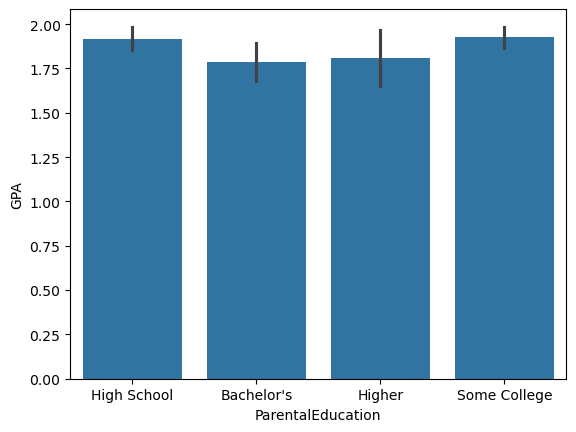

In [45]:
sns.barplot(x=data["ParentalEducation"], y=data["GPA"]);

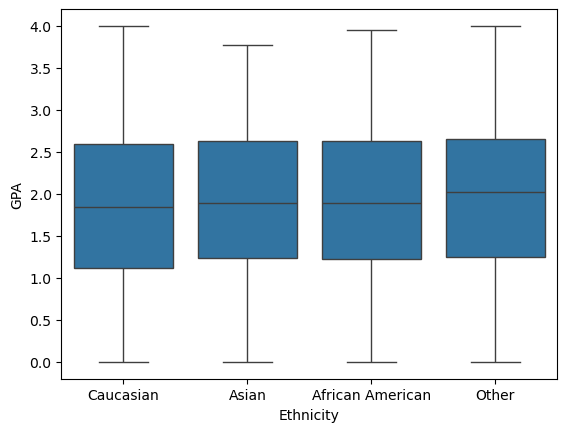

In [46]:
sns.boxplot(x=data["Ethnicity"], y=data["GPA"]);

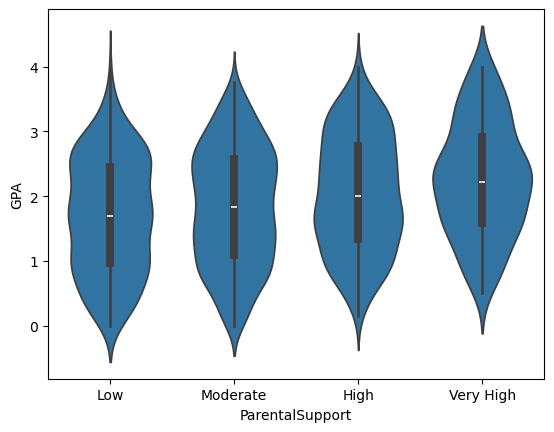

In [47]:
sns.violinplot(x=data["ParentalSupport"], y=data["GPA"], data=data);

### Multivariate Analysis

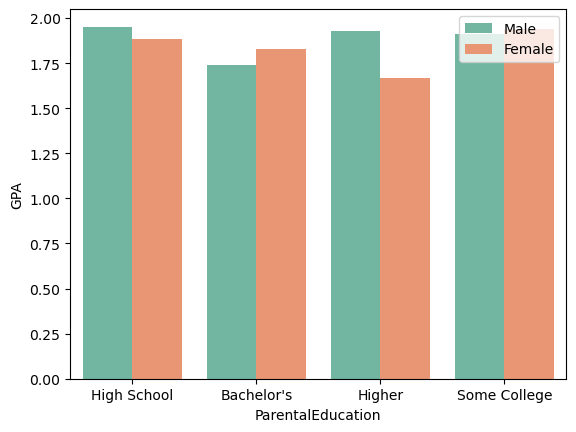

In [48]:
sns.barplot(x="ParentalEducation", y="GPA", hue="Gender", data=data, palette="Set2", errorbar=None);
plt.legend(loc="best");

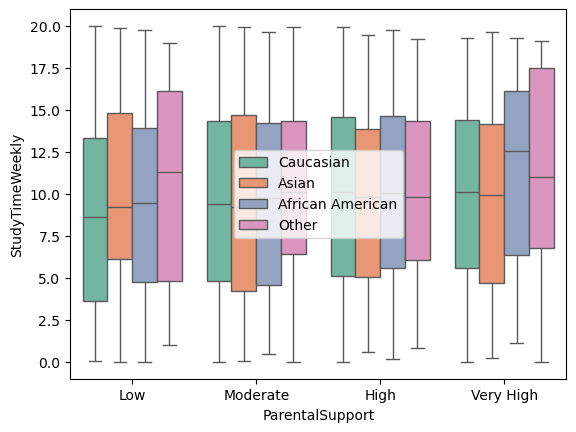

In [49]:
sns.boxplot(x="ParentalSupport", y="StudyTimeWeekly", hue="Ethnicity", data=data, palette="Set2");
plt.legend(loc="best")

In [50]:
numerical_data.head()

,Age,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,36,19.833723,NaN,1,0,0,1,0,2.929196,2.0
1,18,15.408756,0.0,0,0,0,0,0,3.042915,1.0
2,15,4.210570,26.0,0,0,0,0,0,0.112602,4.0
3,17,10.028829,14.0,0,1,0,0,0,2.054218,3.0
4,36,4.672495,17.0,1,0,0,0,0,1.288061,4.0


In [51]:
correlation_map = numerical_data.corr()

<Axes: >

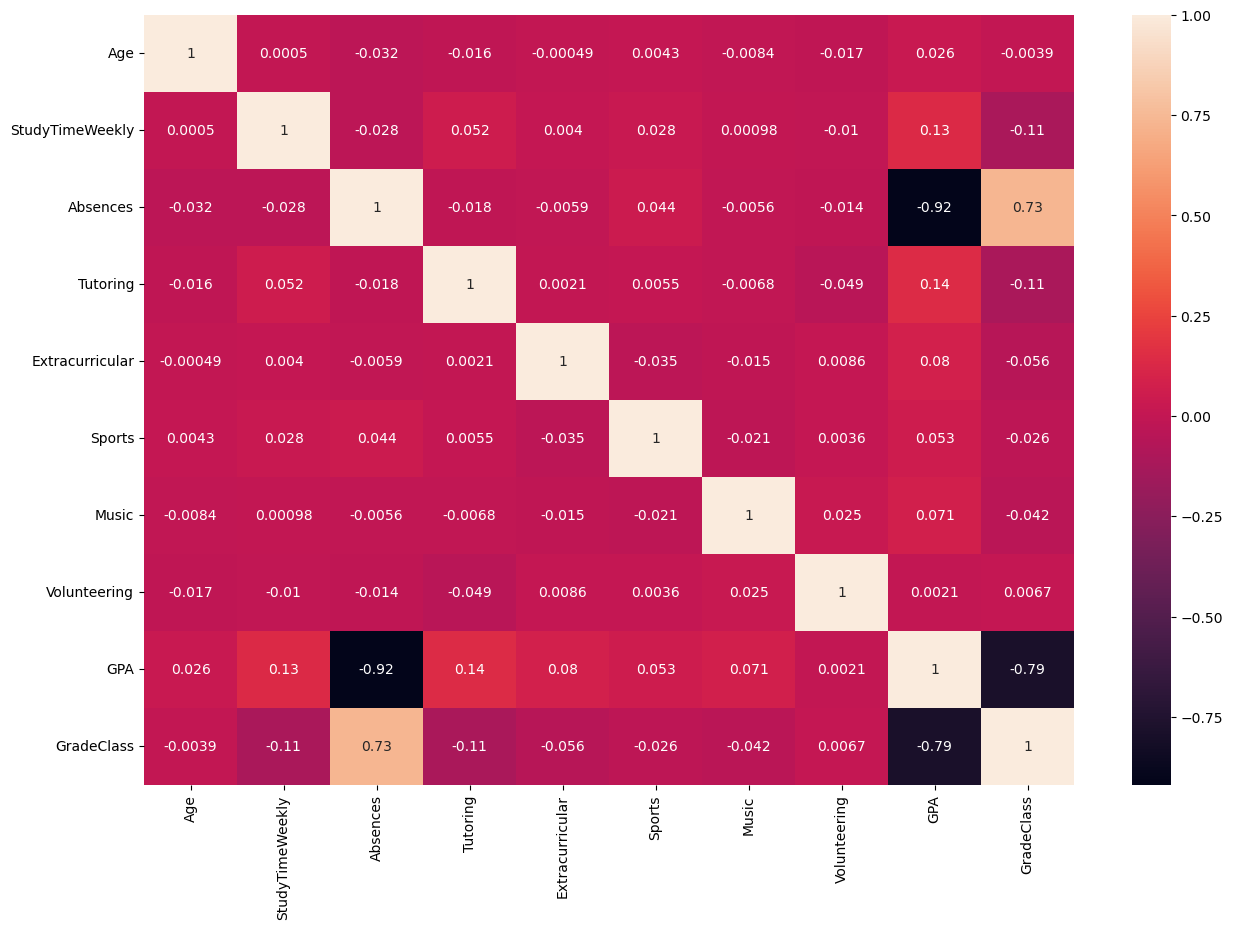

In [52]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_map, annot=True)